In [84]:
from Database import SQLDatabase

In [85]:
# Example usage:
db_manager = SQLDatabase("localhost", "root", "", "water_management_system")

In [86]:
# Connect to the database
db_manager.connect()

Connected to MySQL database.


In [93]:
# Perform database operation (example query)
email = 'adam101@gmail.com'
hashed_password = 'adam101'
query = f"SELECT * FROM users WHERE email = '{email}';"
data = db_manager.read_data(query)
if data['PasswordHash'][0] == hashed_password:
    print("login")

login


In [97]:
data['HouseNO'][0]

101

In [43]:
from DummyData import SampleData

In [44]:
house_numbers = [101, 102, 103]
df = SampleData(house_numbers)

In [45]:
df

,HouseNO,Quantity,FromTime,ToTime,Date
0,101,38,00:00:00,01:00:00,2024-04-01
1,102,28,00:00:00,01:00:00,2024-04-01
2,103,35,00:00:00,01:00:00,2024-04-01
3,101,19,01:00:00,02:00:00,2024-04-01
4,102,42,01:00:00,02:00:00,2024-04-01
...,...,...,...,...,...
30136,102,3,13:00:00,14:00:00,2025-05-24
30137,103,12,13:00:00,14:00:00,2025-05-24
30138,101,19,14:00:00,15:00:00,2025-05-24
30139,102,33,14:00:00,15:00:00,2025-05-24


In [54]:
db_manager.insert_data(df, 'consumption')

DataFrame successfully written to MySQL table.


True

In [52]:
import pandas as pd
data = {
    'HouseNO': [103],
    'UserName': ['max'],
    'PhoneNumber': ['11234223'],
    'HeadCount': [5],
    'Email': [''],
    'PasswordHash': ['']
}

df_1 = pd.DataFrame(data)
print(df_1)

   HouseNO UserName PhoneNumber  HeadCount Email PasswordHash
0      103      max    11234223          5                   


In [53]:
db_manager.insert_data(df_1, 'users')

DataFrame successfully written to MySQL table.


True

In [82]:
# Perform database operation (example query)
query = "SELECT * from users;"
data = db_manager.read_data(query)
data.head(7)


,HouseNO,UserName,PhoneNumber,HeadCount,Email,PasswordHash
0,101,adam,11234223,3,adam101@gmail.com,adam101
1,102,joe,11234223,5,joe102@gmail.com,joe102
2,103,max,11234223,5,max103@gmail.com,max103


In [62]:
# delete operation 
delete_query = "delete from consumption where HouseNo = '103';"
db_manager.delete_data(delete_query)

Data successfully deleted from MySQL table.


True

In [55]:

# Disconnect from the database
db_manager.disconnect()

Disconnected from MySQL database.


**DATA PREPARE FOR GRAPHS**

In [65]:
import pandas as pd

# Function to convert timedelta to HH:MM:SS format
def format_timedelta(time_delta):
    hours = int(time_delta.total_seconds() // 3600)
    minutes = int((time_delta.total_seconds() % 3600) // 60)
    seconds = int(time_delta.total_seconds() % 60)
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

In [66]:
df_data = pd.DataFrame(data)
# Apply the function to create a new column with formatted time
df_data[2] = df_data[2].apply(format_timedelta)
df_data[3] = df_data[3].apply(format_timedelta)

In [67]:
df_data.head()

,0,1,2,3,4
0,1,29,00:00:00,01:00:00,2024-04-01
1,1,1,01:00:00,02:00:00,2024-04-01
2,1,31,02:00:00,03:00:00,2024-04-01
3,1,30,03:00:00,04:00:00,2024-04-01
4,1,42,04:00:00,05:00:00,2024-04-01


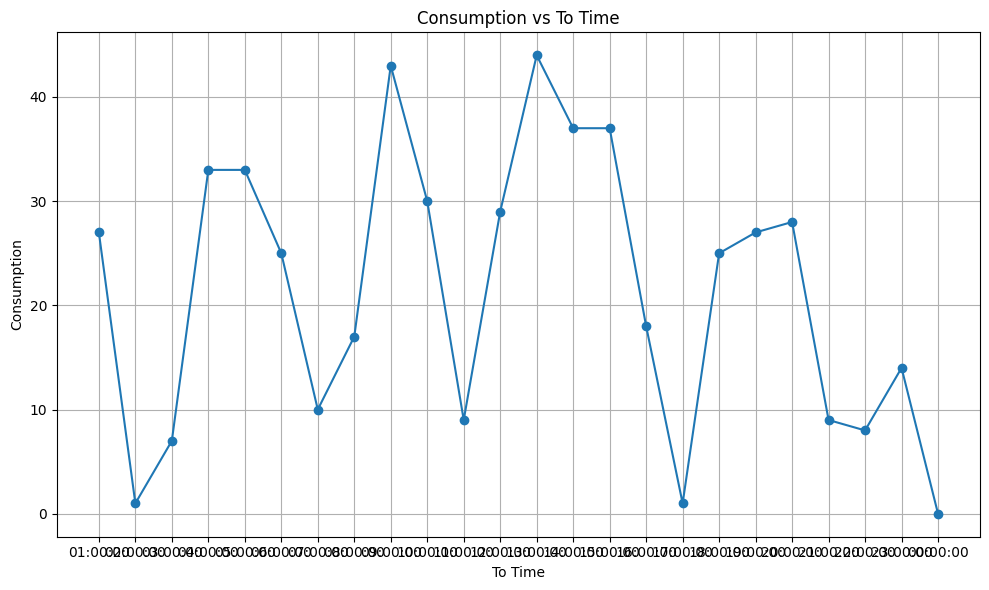

In [72]:
import matplotlib.pyplot as plt
from datetime import date

filtered_df = df_data[24:48]

# Plotting consumption vs to_time
plt.figure(figsize=(10, 6))
plt.plot(filtered_df[3], filtered_df[1], marker='o', linestyle='-')
plt.xlabel('To Time')
plt.ylabel('Consumption')
plt.title('Consumption vs To Time')
plt.grid(True)
plt.tight_layout()
plt.show()
